In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [6]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
X = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:, 1]

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
labelencoder = LabelEncoder()

In [10]:
y = labelencoder.fit_transform(y)

In [14]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distances')

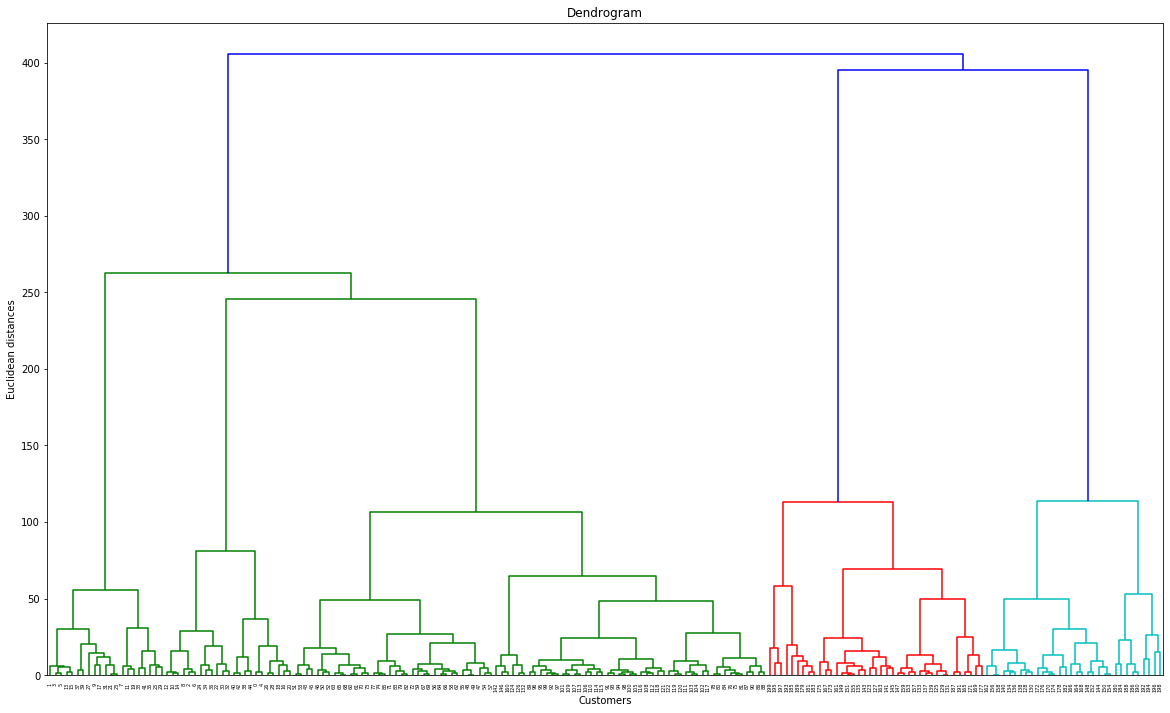

In [18]:
plt.figure(figsize=(20,12))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [24]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

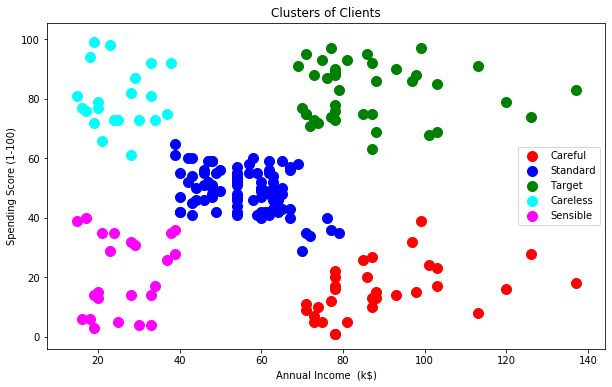

In [26]:
plt.figure(figsize=(10, 6))

plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label='Careful')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label='Standard')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label='Target')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label='Careless')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label='Sensible')

plt.title('Clusters of Clients')
plt.xlabel('Annual Income  (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()